In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df=pd.read_csv("datasets/stock_data.csv",header=1,names=["stock_symbol","eps","revenue","price","people"],na_values={"people":["n.a."],"price":["n.a."],"eps":["not available",-1],"revenue":-1})
df.dropna(thresh=3,inplace=True)
df_new=pd.DataFrame({
    "name":['Rob','Rafiq','Nina','Sofia','Mohan','Tao','Elon Musk'],
    "income":[5000,6000,4000,7500,8000,7000,10000000]
})
df_new["income"].astype(dtype=np.int32)
df_new

,name,income
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000
5,Tao,7000
6,Elon Musk,10000000


In [34]:
df_new.describe()

,income
count,7.000000e+00
mean,1.433929e+06
std,3.777283e+06
min,4.000000e+03
25%,5.500000e+03
50%,7.000000e+03
75%,7.750000e+03
max,1.000000e+07


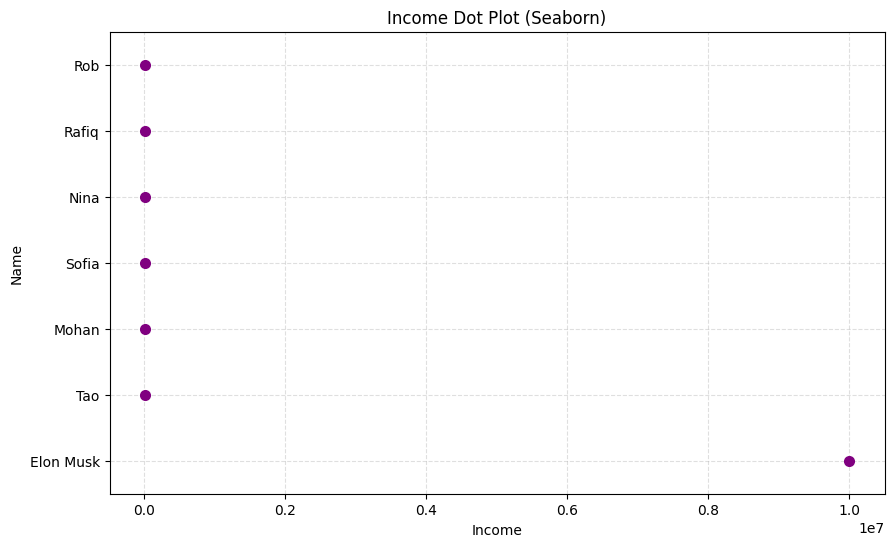

In [133]:
plt.figure(figsize=(10, 6))
sns.stripplot(x="income", y="name", data=df_new, color="purple", size=8, jitter=False)
plt.title("Income Dot Plot (Seaborn)")
plt.xlabel("Income")
plt.ylabel("Name")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

In [113]:
q1=df_new.income.quantile(0.25)
q3=df_new.income.quantile(0.75)
iqr=q3-q1
df_no_outliers=df_new[(df_new.income>q1-1.5*iqr)&(df_new.income<q3+1.5*iqr)]
df_no_outlier

,name,income
0,Rob,5000
1,Rafiq,0
2,Nina,0
3,Sofia,0
4,Mohan,8000
5,Tao,7000


In [126]:
df_no_outlier.replace(0,np.nan,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_7536\3429921797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier.replace(0,np.nan,inplace=True)


In [128]:
df_no_outlier.fillna({"income":round(df_no_outlier.income.mean(),2)})

,name,income
0,Rob,5000.00
1,Rafiq,6666.67
2,Nina,6666.67
3,Sofia,6666.67
4,Mohan,8000.00
5,Tao,7000.00


<h2 style="color:blue font:32">ASS</h2>

In [37]:
df_ny=pd.read_csv("datasets/AB_NYC_2019.csv")
df_ny.room_type.unique()
df_ny[df_ny.room_type.isin([x for x in df_ny.room_type.unique()])].shape

(48895, 16)

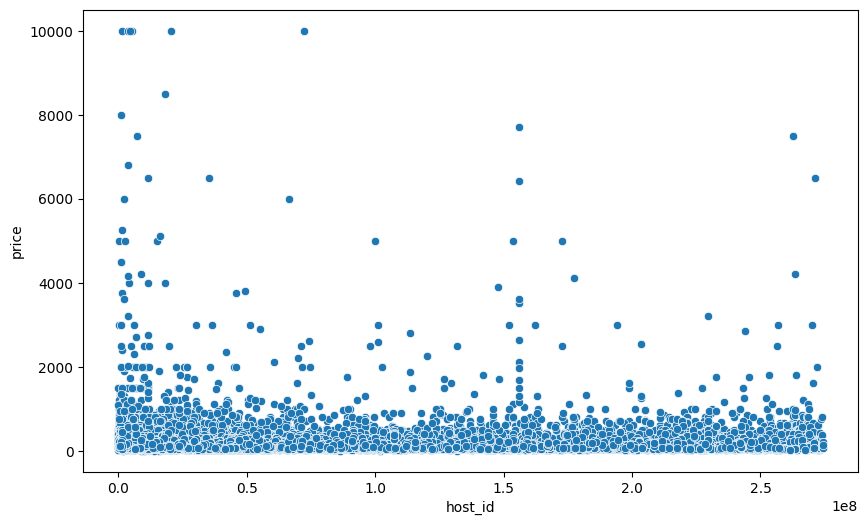

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ny,x="host_id",y="price")
plt.show()

61.5 %


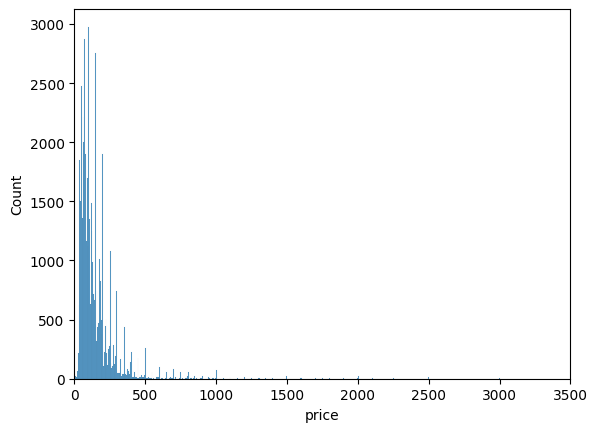

In [17]:
sns.histplot(df_ny["price"])
plt.xlim(0,3500)
q1=df_ny.price.quantile(0.25)
q3=df_ny.price.quantile(0.75)
iqr=q3-q1
mad_val = (df_ny['price'] - df_ny['price'].mean()).abs().mean()
std_val =df_ny.price.std()
print(round((std_val-mad_val)*100/std_val,2),"%")


(45918, 16)

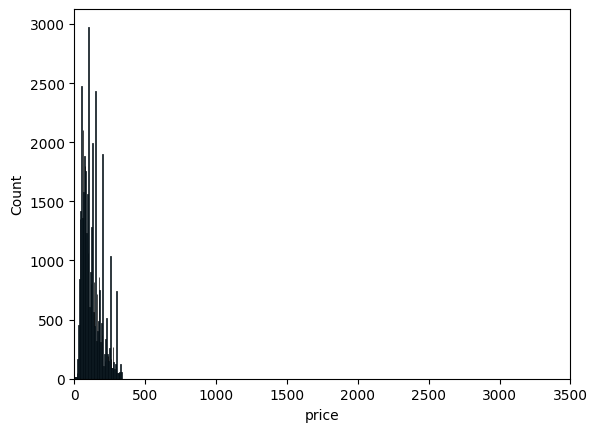

In [24]:
df_ny_no_outliers=df_ny[(df_ny.price>q1-1.5*iqr)&(df_ny.price<q3+1.5*iqr)]
sns.histplot(df_ny_no_outliers["price"])
plt.xlim(0,3500)
df_ny_no_outliers.shape

In [65]:
def remove_nan(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col]=df[col].fillna(df[col].mean().round())
        else:
            df[col]=df[col].fillna("not available")
    return df

In [67]:
remove_nan(df_ny).head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,not available,not available,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.1,1,0


<function matplotlib.pyplot.show(close=None, block=None)>

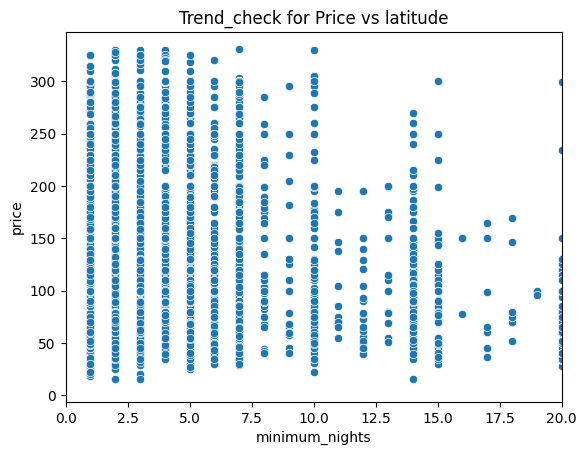

In [79]:
sns.scatterplot(data=df_ny_no_outliers.iloc[2:10000],x="minimum_nights",y="price")
plt.title("Trend_check for Price vs latitude")
plt.show

In [77]:
len(df_ny_no_outliers.host_id.unique())

35388

<h2 style="font:32">New Dataset outlier treatment using std</h2>

In [2]:
df_ml_heights=pd.read_csv("datasets/heights.csv")
df_ml_heights.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [8]:
df_ml_heights.height.describe()
std=df_ml_heights.height.std()
df_ml_heights=df_ml_heights[~((df_ml_heights.height<df_ml_heights.height.mean()-3*std)|(df_ml_heights.height>df_ml_heights.height.mean()+3*std))]
df_ml_heights.height.describe()

count    9993.000000
mean       66.363856
std         3.835511
min        54.873728
25%        63.505894
50%        66.317755
75%        69.169353
max        77.547186
Name: height, dtype: float64

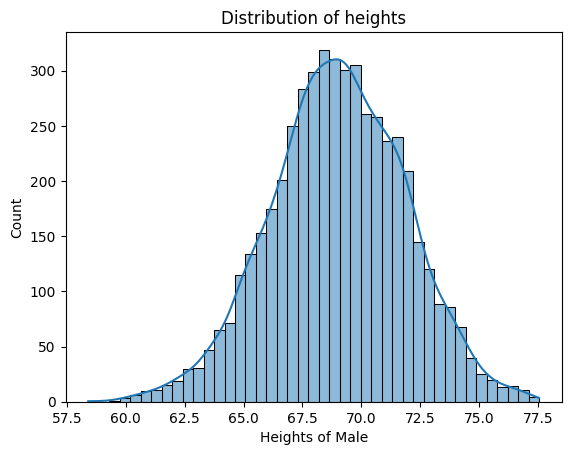

In [15]:
x="Male"
sns.histplot(data=df_ml_heights[df_ml_heights.gender==x], x="height",kde=True, bins='auto')
plt.title("Distribution of heights")
plt.xlabel(f"Heights of {x}")
plt.show()

In [31]:
mad_score=((df_ml_heights.height-df_ml_heights.height.mean()).abs()).mean()
diff=((std-mad_score)*100/std).round(2)
print(diff,"%")
print((lambda x: "Use std to remove outliers" if x<50 else "use iqr")(diff))


17.57 %
Use std to remove outliers
